Gaussian filtering. Show the result using σ = 1,2,4,8 pixels and explain
in detail what can be seen.

In [6]:
import numpy as np
import cv2
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
#we load libraries

In [7]:
image = cv2.imread('lenna.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#we load the image and convert it to RGB with opencv

In [8]:
def gaussian_kernel(size, sigma):
    x = np.arange(-size // 2 + 1, size // 2 + 1)
    kernel = np.exp(-x**2 / (2 * sigma**2))
    return kernel / np.sum(kernel)
#we define a gaussian kernel function according to the formula given in the notes

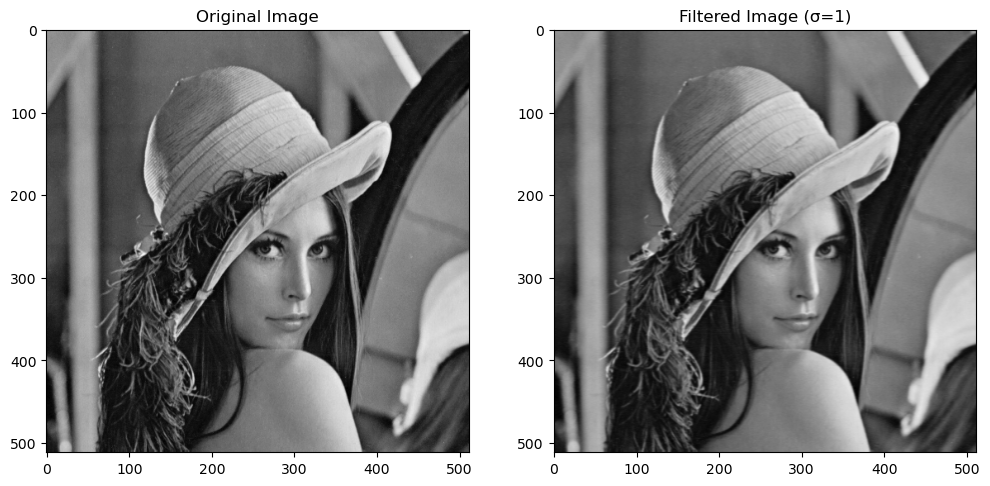

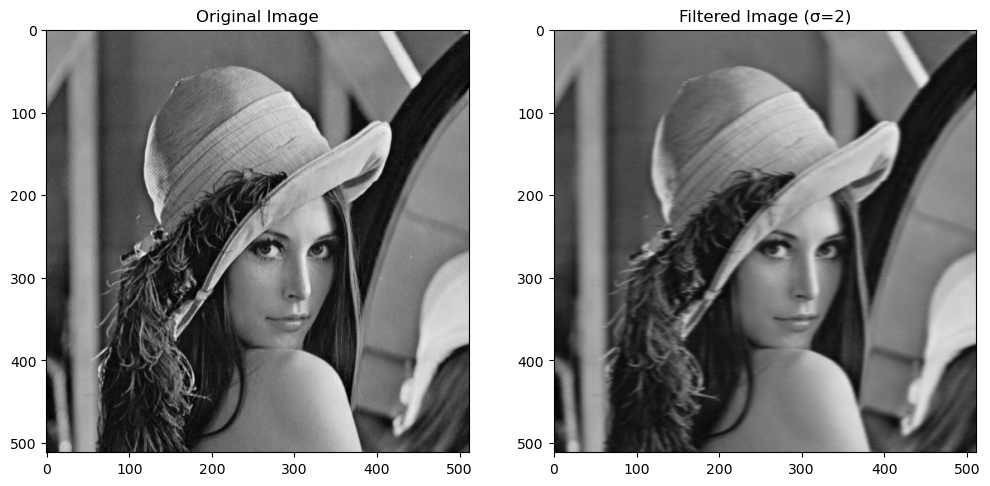

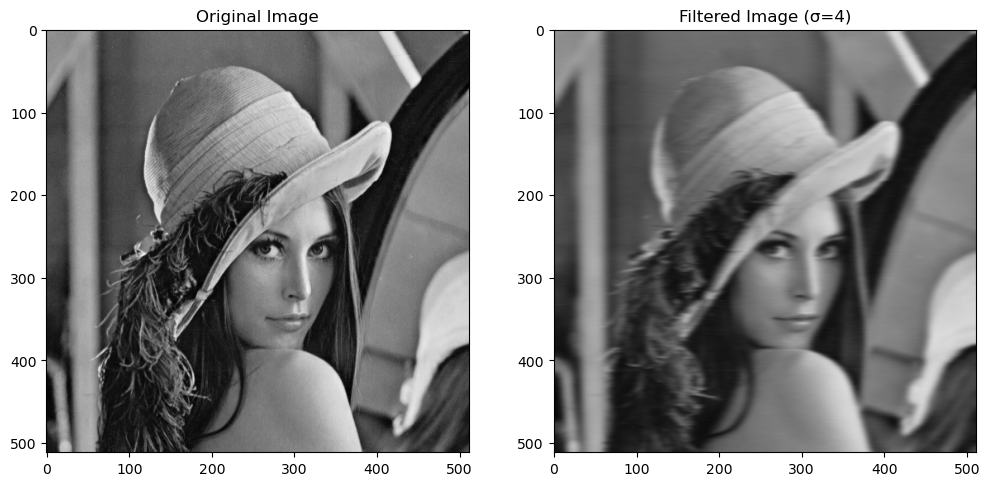

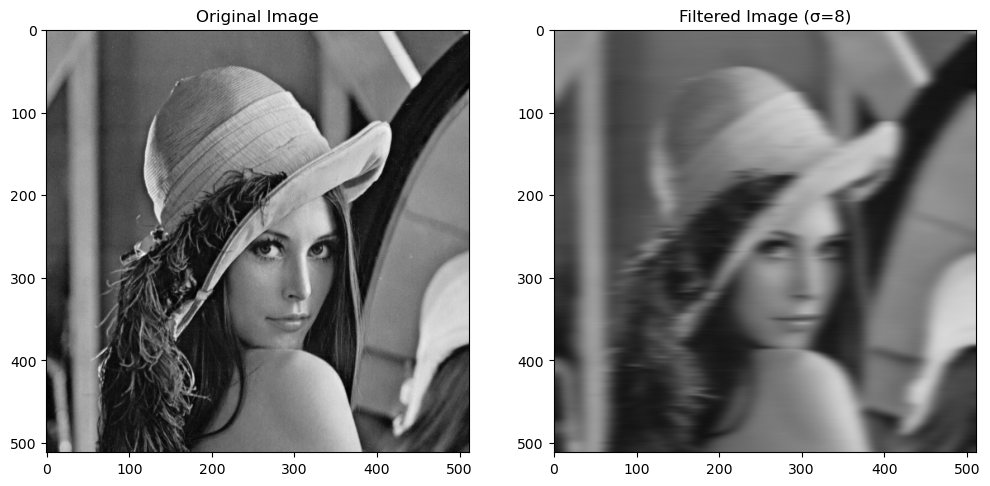

In [10]:
sigmas = [1, 2, 4, 8]
#we define the sigmas we want to use
#we use a for loop to iterate over the sigmas
for sigma in sigmas:
    #we create an instance of the gaussian kernel with the sigma value
    size = int(6 * sigma + 1) if (int(6 * sigma + 1) % 2 == 1) else int(6 * sigma + 2)
    kernel = gaussian_kernel(size, sigma)

    #we filter the image with the kernel in both axis
    filtered_image = convolve1d(image, kernel, axis=0, mode='reflect')
    filtered_image = convolve1d(image, kernel, axis=1, mode='reflect')


    #we plot the images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image)
    plt.title(f'Filtered Image (σ={sigma})')

    plt.show()
